Start your notebook here:

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn

#import the libraries we'll be using

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
filepath = "../cars.csv"
data = pd.read_csv(filepath, index_col = 0)

In [3]:
data

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
1,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
2,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
3,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
4,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
5,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mercedes-Benz AMG A 45 S,35,Petrol,1991,4,5.0,Automatic,0.0,Hatchback,4.5,659000,999000,500.0,5250,415.71,6750
200,BMW 3 Series Gran Limousine,3,Petrol,1998,4,5.0,Automatic,59.0,Sedan,4.5,1041000,1041000,400.0,4400,254.79,5000
201,MG Hector Plus,2,Diesel,1956,4,7.0,Manual,60.0,SUV,4.5,1615000,2075000,350.0,2500,167.67,3750
202,Audi RS Q8,9,Petrol,3998,8,5.0,Automatic,85.0,SUV,3.5,21700000,21700000,800.0,4500,591.39,6000


In [4]:
data['seating_capacity'] = data['seating_capacity'].replace(np.nan, 0)

In [5]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  203


,Total Missing,In Percent
car_name,0,0.0
reviews_count,0,0.0
fuel_type,0,0.0
engine_displacement,0,0.0
no_cylinder,0,0.0
seating_capacity,0,0.0
transmission_type,0,0.0
fuel_tank_capacity,0,0.0
body_type,0,0.0
rating,0,0.0


In [6]:
duplicates = data[data.duplicated()]

duplicates.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp


In [7]:
data = data.drop_duplicates()

data.shape

(203, 16)

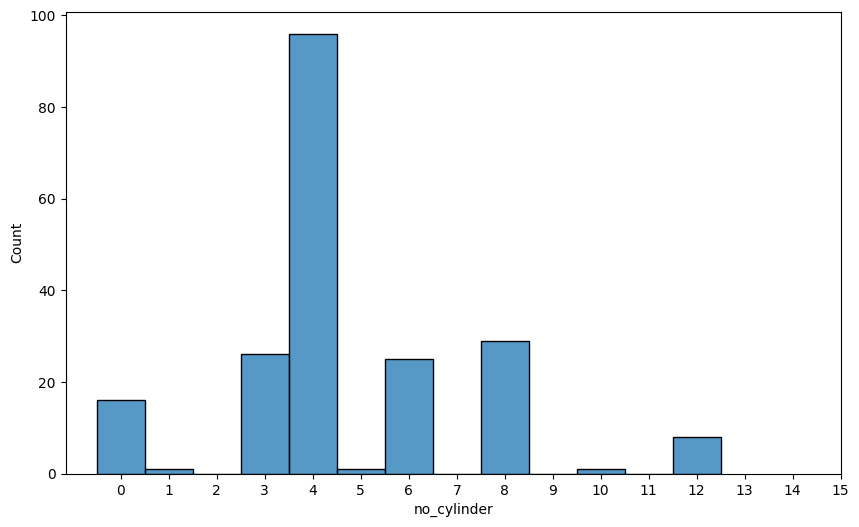

In [8]:
index=range(0,16)
plt.figure(figsize=(10, 6))
cylinder_count = data[["car_name","no_cylinder"]].sort_values(by = 'no_cylinder', ascending = False)
sns.histplot(data = cylinder_count['no_cylinder'], discrete=True) # type: ignore
plt.xticks([i for i in index], [i for i in index]) # type: ignore
plt.show()


In [9]:
df_cylinders = pd.DataFrame({
    'car_name': data['car_name'].tolist(),
    'no_cylinder': data['no_cylinder'].tolist()
})

df_cylinders = df_cylinders.explode('no_cylinder')
df_cylinders

,car_name,no_cylinder
0,Maruti Alto K10,3
1,Maruti Brezza,4
2,Mahindra Thar,4
3,Mahindra XUV700,4
4,Mahindra Scorpio-N,4
...,...,...
198,Mercedes-Benz AMG A 45 S,4
199,BMW 3 Series Gran Limousine,4
200,MG Hector Plus,4
201,Audi RS Q8,8


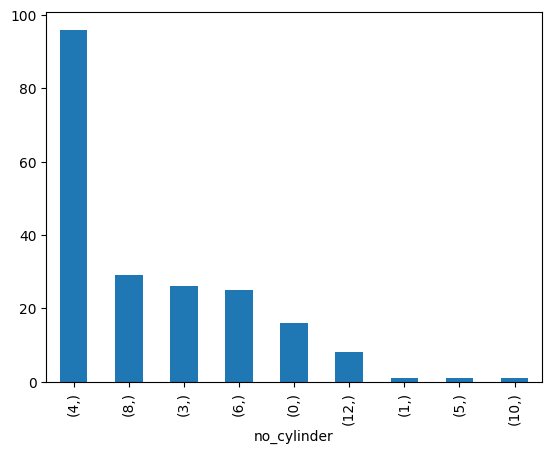

In [10]:
list_cylinders = pd.DataFrame(df_cylinders['no_cylinder'])
count_cylinders = list_cylinders.value_counts().plot(kind='bar')

In [11]:
df_body_type = pd.DataFrame({
    'car_name': data['car_name'].tolist(),
    'body_type': data['body_type'].tolist()
})
df_body_type

,car_name,body_type
0,Maruti Alto K10,Hatchback
1,Maruti Brezza,SUV
2,Mahindra Thar,SUV
3,Mahindra XUV700,SUV
4,Mahindra Scorpio-N,SUV
...,...,...
198,Mercedes-Benz AMG A 45 S,Hatchback
199,BMW 3 Series Gran Limousine,Sedan
200,MG Hector Plus,SUV
201,Audi RS Q8,SUV


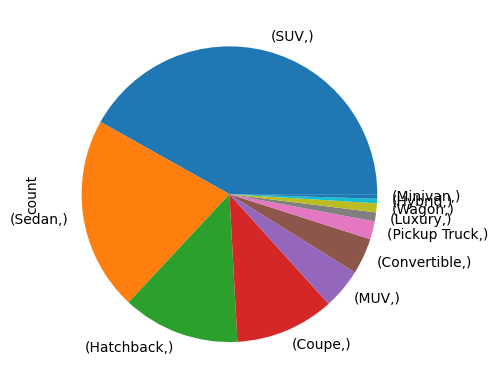

In [12]:
list_body_type = pd.DataFrame(df_body_type['body_type'])
count_body_type = list_body_type.value_counts().plot(kind='pie')